# Project 2: Topic Classification

In this project, you'll work with text data from newsgroup posts on a variety of topics. You'll train classifiers to distinguish posts by topics inferred from the text. Whereas with digit classification, where each input is relatively dense (represented as a 28x28 matrix of pixels, many of which are non-zero), here each document is relatively sparse (represented as a bag-of-words). Only a few words of the total vocabulary are active in any given document. The assumption is that a label depends only on the count of words, not their order.

The `sklearn` documentation on feature extraction may be useful:
http://scikit-learn.org/stable/modules/feature_extraction.html

Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on Slack, but <b> please prepare your own write-up with your own code. </b>

In [202]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# General libraries.
import re
import numpy as np
import matplotlib.pyplot as plt

# SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

# SK-learn library for importing the newsgroup data.
from sklearn.datasets import fetch_20newsgroups

# SK-learn libraries for feature extraction from text.
from sklearn.feature_extraction.text import *

import nltk

Load the data, stripping out metadata so that only textual features will be used, and restricting documents to 4 specific topics. By default, newsgroups data is split into training and test sets, but here the test set gets further split into development and test sets.  (If you remove the categories argument from the fetch function calls, you'd get documents from all 20 topics.)

In [203]:
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
newsgroups_train = fetch_20newsgroups(subset='train',
                                      remove=('headers', 'footers', 'quotes'),
                                      categories=categories)
newsgroups_test  = fetch_20newsgroups(subset='test',
                                      remove=('headers', 'footers', 'quotes'),
                                      categories=categories)

num_test = int(len(newsgroups_test.target) / 2)
test_data, test_labels   = newsgroups_test.data[num_test:], newsgroups_test.target[num_test:]
dev_data, dev_labels     = newsgroups_test.data[:num_test], newsgroups_test.target[:num_test]
train_data, train_labels = newsgroups_train.data, newsgroups_train.target

print('training label shape:', train_labels.shape)
print('dev label shape:',      dev_labels.shape)
print('test label shape:',     test_labels.shape)
print('labels names:',         newsgroups_train.target_names)

training label shape: (2034,)
dev label shape: (676,)
test label shape: (677,)
labels names: ['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']


### Part 1:

For each of the first 5 training examples, print the text of the message along with the label.

In [204]:
def P1(num_examples=5):
    ### STUDENT START ###
    for i in range(0,num_examples):
        print("message:",train_data[i]) 
        print("label:",newsgroups_train.target_names[train_labels[i]])
        print("")
    
    ### STUDENT END ###

P1(5)

message: Hi,

I've noticed that if you only save a model (with all your mapping planes
positioned carefully) to a .3DS file that when you reload it after restarting
3DS, they are given a default position and orientation.  But if you save
to a .PRJ file their positions/orientation are preserved.  Does anyone
know why this information is not stored in the .3DS file?  Nothing is
explicitly said in the manual about saving texture rules in the .PRJ file. 
I'd like to be able to read the texture rule information, does anyone have 
the format for the .PRJ file?

Is the .CEL file format available from somewhere?

Rych
label: comp.graphics

message: 

Seems to be, barring evidence to the contrary, that Koresh was simply
another deranged fanatic who thought it neccessary to take a whole bunch of
folks with him, children and all, to satisfy his delusional mania. Jim
Jones, circa 1993.


Nope - fruitcakes like Koresh have been demonstrating such evil corruption
for centuries.
label: talk.religion.

### Part 2:

Transform the training data into a matrix of **word** unigram feature vectors.  What is the size of the vocabulary? What is the average number of non-zero features per example?  What is the fraction of the non-zero entries in the matrix?  What are the 0th and last feature strings (in alphabetical order)?<br/>
_Use `CountVectorization` and its `.fit_transform` method.  Use `.nnz` and `.shape` attributes, and `.get_feature_names` method._

Now transform the training data into a matrix of **word** unigram feature vectors using your own vocabulary with these 4 words: ["atheism", "graphics", "space", "religion"].  Confirm the size of the vocabulary. What is the average number of non-zero features per example?<br/>
_Use `CountVectorization(vocabulary=...)` and its `.transform` method._

Now transform the training data into a matrix of **character** bigram and trigram feature vectors.  What is the size of the vocabulary?<br/>
_Use `CountVectorization(analyzer=..., ngram_range=...)` and its `.fit_transform` method._

Now transform the training data into a matrix of **word** unigram feature vectors and prune words that appear in fewer than 10 documents.  What is the size of the vocabulary?<br/>
_Use `CountVectorization(min_df=...)` and its `.fit_transform` method._

Now again transform the training data into a matrix of **word** unigram feature vectors. What is the fraction of words in the development vocabulary that is missing from the training vocabulary?<br/>
_Hint: Build vocabularies for both train and dev and look at the size of the difference._

Notes:
* `.fit_transform` makes 2 passes through the data: first it computes the vocabulary ("fit"), second it converts the raw text into feature vectors using the vocabulary ("transform").
* `.fit_transform` and `.transform` return sparse matrix objects.  See about them at http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.sparse.csr_matrix.html.  

In [176]:
def P2():
    ### STUDENT START ###
    # sec 1  
    coun_vect = CountVectorizer()
    count_matrix = coun_vect.fit_transform(train_data)
    count_array = count_matrix.toarray()
    print("average numbers of nonzero features",np.average(np.count_nonzero(count_array, axis=1)))
    print("size of the vocabulary",np.shape(coun_vect.get_feature_names()))
    print("first word in voc",coun_vect.get_feature_names()[0])
    print("last word in voc",coun_vect.get_feature_names()[-1])
    print("fraction of the non-zero entries",(np.count_nonzero(count_array)) /(len(count_array)*len(count_array[0])))
    
    # sec2
    voc = {"atheism":0, "graphics":1, "space":2, "religion":3}
    coun_vect = CountVectorizer(vocabulary =  voc)
    count_matrix = coun_vect.fit_transform(train_data)
    count_array = count_matrix.toarray()
    print("voc name", (coun_vect.get_feature_names()))
    print("voc size",np.shape(coun_vect.get_feature_names()))
    print("average numbers of nonzero features",np.average(np.count_nonzero(count_array, axis=1)))

    
    # sec3
    coun_vect = CountVectorizer(analyzer='char', ngram_range = (2,3))
    count_matrix = coun_vect.fit_transform(train_data)
    count_array = count_matrix.toarray()
    print("size of voc",np.shape(coun_vect.get_feature_names()))

    
    #sec4
    coun_vect = CountVectorizer(analyzer='word', min_df=10)
    count_matrix = coun_vect.fit_transform(train_data)
    count_array = count_matrix.toarray()
    print("size of voc",np.shape(coun_vect.get_feature_names()))

    #sec5
    coun_vect = CountVectorizer(analyzer='word')
    count_matrix = coun_vect.fit_transform(train_data)
    count_array = count_matrix.toarray()
    print("size of voc",np.shape(coun_vect.get_feature_names()))
    
    coun_vect_dev = CountVectorizer(analyzer='word')
    count_matrix_dev = coun_vect_dev.fit_transform(dev_data)
    count_array_dev = count_matrix_dev.toarray()
#     print(type(coun_vect_dev.get_feature_names()))
    
    list2 = coun_vect_dev.get_feature_names()
    list1 = coun_vect.get_feature_names()
    diff = (set(list2).difference(list1))
    print("missing ratio",len(diff)/len(list2))
   
    ### STUDENT END ###

P2()

average numbers of nonzero features 96.70599803343165
size of the vocabulary (26879,)
first word in voc 00
last word in voc zyxel
fraction of the non-zero entries 0.0035978272269590263
voc name ['atheism', 'graphics', 'space', 'religion']
voc size (4,)
average numbers of nonzero features 0.26843657817109146
size of voc (35478,)
size of voc (3064,)
size of voc (26879,)
missing ratio 0.24787640034470024


ANSWERS:

Transform the training data into a matrix of word unigram feature vectors. 

What is the size of the vocabulary? 

A: The size is 26879

What is the average number of non-zero features per example? 

A: 96.7 per example

What is the fraction of the non-zero entries in the matrix? 

A: 0.00359

What are the 0th and last feature strings (in alphabetical order)?

A: The first word is 00 and last is xyzel


Now transform the training data into a matrix of word unigram feature vectors using your own vocabulary with these 4 words: ["atheism", "graphics", "space", "religion"]. 
Confirm the size of the vocabulary. 

A: Confirmed the size is 4

What is the average number of non-zero features per example?

A: 0.268

Now transform the training data into a matrix of character bigram and trigram feature vectors. 
What is the size of the vocabulary?

A: The size is 35478

Now transform the training data into a matrix of word unigram feature vectors and prune words that appear in fewer than 10 documents. 

What is the size of the vocabulary?

A: The size is 3064

Now again transform the training data into a matrix of word unigram feature vectors. 
What is the fraction of words in the development vocabulary that is missing from the training vocabulary?

A: The missing fraction is 0.247


### Part 3:

Transform the training and development data to matrices of word unigram feature vectors.

1. Produce several k-Nearest Neigbors models by varying k, including one with k set to optimize f1 score.  For each model, show the k value and f1 score.
1. Produce several Naive Bayes models by varying smoothing (alpha), including one with alpha set approximately to optimize f1 score.  For each model, show the alpha value and f1 score.
1. Produce several Logistic Regression models by varying L2 regularization strength (C), including one with C set approximately to optimize f1 score.  For each model, show the C value, f1 score, and sum of squared weights for each topic.

* Why doesn't k-Nearest Neighbors work well for this problem?
* Why doesn't Logistic Regression work as well as Naive Bayes does?
* What is the relationship between logistic regression's sum of squared weights vs. C value?

Notes:
* Train on the transformed training data.
* Evaluate on the transformed development data.
* You can use `CountVectorizer` and its `.fit_transform` and `.transform` methods to transform data.
* You can use `KNeighborsClassifier(...)` to produce a k-Nearest Neighbors model.
* You can use `MultinomialNB(...)` to produce a Naive Bayes model.
* You can use `LogisticRegression(C=..., solver="liblinear", multi_class="auto")` to produce a Logistic Regression model.
* You can use `LogisticRegression`'s `.coef_` method to get weights for each topic.
* You can use `metrics.f1_score(..., average="weighted")` to compute f1 score.

In [5]:
def P3():
    ### STUDENT START ###
    from sklearn.metrics import f1_score
    #0
    coun_vect = CountVectorizer(analyzer='word')
    count_matrix = coun_vect.fit_transform(train_data)
    count_matrix_dev = coun_vect.transform(dev_data)


    #1
    k_values=[1,2,5,10,15,20,30,50]

    for k in k_values:
        KNN = KNeighborsClassifier(n_neighbors=k)
        KNN.fit(count_matrix, train_labels)
        y_pred = KNN.predict(count_matrix_dev)
        print("k = ", k, " f1 score:", f1_score(dev_labels, y_pred, average='micro'))

    #2
    alphas =  [1.0e-10, 0.0001, 0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1]
    for a in alphas:
        NB = MultinomialNB(alpha = a)
        NB.fit(count_matrix, train_labels)
        y_pred = NB.predict(count_matrix_dev)
        print("alpha = ", a, " f1 score:", f1_score(dev_labels, y_pred, average='micro'))
    
    #3
    C_reg = [0.01, 0.025, 0.05, 0.1, 0.25, 0.5, 0.75, 1]
    voc = ['atheism', 'graphics', 'space', 'religion']
    for c in C_reg:
        LGR = LogisticRegression(C= c, solver="liblinear", multi_class="auto")
        LGR.fit(count_matrix, train_labels)
        y_pred = LGR.predict(count_matrix_dev)
        
        print("C = ", c, " f1 score = ", f1_score(dev_labels, y_pred, average='weighted'))
        print("Sum of sqrd weights = ", np.sum(np.square(LGR.coef_), axis = 1))
    

    ### STUDENT END ###

P3()

k =  1  f1 score: 0.3831360946745562
k =  2  f1 score: 0.39644970414201186
k =  5  f1 score: 0.4230769230769231
k =  10  f1 score: 0.42159763313609466
k =  15  f1 score: 0.4334319526627219
k =  20  f1 score: 0.4260355029585799
k =  30  f1 score: 0.43195266272189353
k =  50  f1 score: 0.4245562130177515
alpha =  1e-10  f1 score: 0.7544378698224852
alpha =  0.0001  f1 score: 0.7692307692307693
alpha =  0.001  f1 score: 0.7751479289940828
alpha =  0.01  f1 score: 0.7795857988165681
alpha =  0.1  f1 score: 0.7928994082840237
alpha =  0.25  f1 score: 0.7914201183431951
alpha =  0.5  f1 score: 0.7884615384615384
alpha =  0.75  f1 score: 0.7869822485207101
alpha =  1  f1 score: 0.7810650887573964
C =  0.01  f1 score =  0.6646997417582748
Sum of sqrd weights =  [2.54147899 2.93970937 2.86246884 2.25002923]
C =  0.025  f1 score =  0.6644427912383478
Sum of sqrd weights =  [6.93990212 7.26868989 7.44620322 5.88545223]
C =  0.05  f1 score =  0.6866730854341511
Sum of sqrd weights =  [14.07061618 

ANSWERS:

Transform the training and development data to matrices of word unigram feature vectors.
 
Produce several k-Nearest Neigbors models by varying k, including one with k set to optimize f1 score. For each model, show the k value and f1 score.

A: The optimized k based on the search is k = 15, f1 = 0.433

Produce several Naive Bayes models by varying smoothing (alpha), including one with alpha set approximately to optimize f1 score. For each model, show the alpha value and f1 score.

A: The optimized alpha based on the search is alpha = 0.1, f1 = 0.792

Produce several Logistic Regression models by varying L2 regularization strength (C), including one with C set approximately to optimize f1 score. For each model, show the C value, f1 score, and sum of squared weights for each topic.

A: The optimized C based on the search is C = 0.5, f1 = 0.708, Sum of sqrd weights =  [102.61858244  83.12025024  99.02665761  88.99292605]

Why doesn't k-Nearest Neighbors work well for this problem?

A: In high dimensions, in this case 20000+ features, the distances among datasets become really similar so the KNN clustering doesn’t work well.  

Why doesn't Logistic Regression work as well as Naive Bayes does?

A: I think it’s because the decision boundaries of this dataset are not linear, therefore logistic regression cannot fully capture the categories. However, the nonlinear boundaries might be better captured by probability even under the assumption of independence.  

What is the relationship between logistic regression's sum of squared weights vs. C value?

A: The sum of squared weights increases with decreasing C. The more you penalize (lower C), the less the weights of the features you get. 



### Part 4:

Transform the data to a matrix of word **bigram** feature vectors.  Produce a Logistic Regression model.  For each topic, find the 5 features with the largest weights (that's 20 features in total).  Show a 20 row (features) x 4 column (topics) table of the weights.

Do you see any surprising features in this table?

Notes:
* Train on the transformed training data.
* You can use `CountVectorizer` and its `.fit_transform` method to transform data.
* You can use `LogisticRegression(C=0.5, solver="liblinear", multi_class="auto")` to produce a Logistic Regression model.
* You can use `LogisticRegression`'s `.coef_` method to get weights for each topic.
* You can use `np.argsort` to get indices sorted by element value. 

In [201]:
def P4():
    ### STUDENT START ###
    categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
    categories.sort()
    coun_vect = CountVectorizer(analyzer='word', ngram_range=(2,2))
    count_matrix = coun_vect.fit_transform(train_data)
    count_array = count_matrix.toarray()
    feature_name = coun_vect.get_feature_names()
    LGR = LogisticRegression(C=0.5, solver="liblinear", multi_class="auto") 
    LGR.fit(count_matrix, train_labels)
#     print(LGR.coef_.shape)
    best_n = np.argsort(np.abs(LGR.coef_), axis=1)[:,-5:]
#     for i in range(0,4):
#         print(categories[i])
#         print(np.array(coun_vect.get_feature_names())[best_n[i]])
#         print(LGR.coef_[i, best_n[i]])
        
        
    # print table    
    best_nf = best_n.flatten()
    template = '| {0:16} |{1:8}|{2:8}|{3:8}|{4:8}|' 
    for i in range(0,20):
        print(template.format(np.array(coun_vect.get_feature_names())[best_nf[i]], \
                              LGR.coef_[0][best_nf[i]], \
                              LGR.coef_[1][best_nf[i]], \
                              LGR.coef_[2][best_nf[i]], \
                              LGR.coef_[3][best_nf[i]]))  
    ### STUDENT END ###

P4()



| you are          |0.4727410678029455|-0.27990883621187757|-0.48144560652989665|0.02838189681070378|
| was just         |0.4820504282514528|-0.13141969012144752|-0.1288566859657528|-0.22746262124487038|
| cheers kent      |0.5557193560274426|-0.6979081417417845|-0.6637870931927203|0.5348123511244915|
| claim that       |0.6055483581281599|-0.19904247406930806|-0.27438759316761185|-0.14036525128744615|
| looking for      |-0.6303407421598413|1.1083652438931857|-0.4999294290701043|-0.5718558972954099|
| is there         |-0.3408817537053822|0.7549788012531637|-0.46825302183876044|-0.25708452828081335|
| out there        |-0.2748022019543725|0.7586775000547401|-0.47901754865199486|-0.27708140918849533|
| comp graphics    |-0.29216536955021083|0.8012034332976936|-0.37090249218289034|-0.2851863375378996|
| in advance       |-0.4593508014500482|0.8325683389734327|-0.4384910053005233|-0.4184549960454566|
| looking for      |-0.6303407421598413|1.1083652438931857|-0.4999294290701043|-0.571855

ANSWER:

Transform the data to a matrix of word bigram feature vectors. Produce a Logistic Regression model. 

For each topic, find the 5 features with the largest weights (that's 20 features in total). 

Show a 20 row (features) x 4 column (topics) table of the weights.

Do you see any surprising features in this table?

A: “cheers kent” shows up multiple times. So it seems like someone is having a lot of communication with this Kent. Also, a lot of the words are just connecting works such as “you are”, “was just”, and “looking for”. We may want to eliminate those to improve the performance of the model.  



### Part 5:

To improve generalization, it is common to try preprocessing text in various ways before splitting into words. For example, you could try transforming strings to lower case, replacing sequences of numbers with single tokens, removing various non-letter characters, and shortening long words.

Produce a Logistic Regression model (with no preprocessing of text).  Evaluate and show its f1 score and size of the dictionary.

Produce an improved Logistic Regression model by preprocessing the text.  Evaluate and show its f1 score and size of the vocabulary.  Try for an improvement in f1 score of at least 0.02.

How much did the improved model reduce the vocabulary size?

Notes:
* Train on the transformed training data.
* Evaluate on the transformed development data.
* You can use `CountVectorizer(preprocessor=...)` to preprocess strings with your own custom-defined function.
* `CountVectorizer` default is to preprocess strings to lower case.
* You can use `LogisticRegression(C=0.5, solver="liblinear", multi_class="auto")` to produce a logistic regression model.
* You can use `metrics.f1_score(..., average="weighted")` to compute f1 score.
* If you're not already familiar with regular expressions for manipulating strings, see https://docs.python.org/2/library/re.html, and re.sub() in particular.

In [177]:
from sklearn.metrics import f1_score

def null_preprocessor(s):
    return s

def good_preprocessor(s):

    s2 = re.sub(r"\w*\d\w*", '', s) # remove digits
    s2 = re.sub(r'\b\w{1,3}\b', '', s2) # remove short words
    s2 = re.sub(',', '', s2) # remove comma
    s2 = re.sub('!', '', s2) # remove comma

    s2 = re.sub(r'&+', '', s2) # remove words with special char
    s2 = re.sub(r'_+', '', s2) # remove words with special char
    s2 = re.sub(r'#+', '', s2) # remove words with special char
    s2 = re.sub(r'@+', '', s2) # remove words with special char
    
    
    return s2

def P5():

    # no preprocessing    
    coun_vect = CountVectorizer(preprocessor=null_preprocessor)
#     coun_vect = CountVectorizer()
    count_matrix = coun_vect.fit_transform(train_data)
    count_matrix_dev = coun_vect.transform(dev_data)
    feature_name = coun_vect.get_feature_names()
    
    LGR = LogisticRegression(C=0.5, solver="liblinear", multi_class="auto") 
    LGR.fit(count_matrix, train_labels)
    y_pred = LGR.predict(count_matrix_dev)
    f1 = f1_score(dev_labels, y_pred,average="weighted")
    print("No preprocessing","size =", len(feature_name), "F1 =",f1 )
    
    # processed 
    coun_vect = CountVectorizer(preprocessor=good_preprocessor)
    count_matrix = coun_vect.fit_transform(train_data)
    count_matrix_dev = coun_vect.transform(dev_data)
    feature_name = coun_vect.get_feature_names()
    
    LGR = LogisticRegression(C=0.5, solver="liblinear", multi_class="auto") 
    LGR.fit(count_matrix, train_labels)
    y_pred = LGR.predict(count_matrix_dev)
    f1 = f1_score(dev_labels, y_pred,average="weighted")
    print("With preprocessing","size =", len(feature_name), "F1 =",f1 )    
  

P5()


No preprocessing size = 33291 F1 = 0.7069109185493502
With preprocessing size = 27629 F1 = 0.7206946282104394


ANSWER:

Produce an improved Logistic Regression model by preprocessing the text. Evaluate and show its f1 score and size of the vocabulary. Try for an improvement in f1 score of at least 0.02.

How much did the improved model reduce the vocabulary size?

A: In this case, I reduced the vocabulary size from 33291 to 27629. The F1 score improved from 0.7 to 0.72. I generated a preprocessor that eliminates words containing digits, special characters, and shorter than 4 characters.

One interesting discovery is that if I don’t pass in any preprocessor into the countvectorizer, the size is  26879, However, if I pass in a null preprocessor, the size becomes 33291. I think it’s because the vectorizer generates different features based on different input arguments. 


### Part 6:

The idea of regularization is to avoid learning very large weights (which are likely to fit the training data, but not generalize well) by adding a penalty to the total size of the learned weights. Logistic regression seeks the set of weights that minimizes errors in the training data AND has a small total size. The default L2 regularization computes this size as the sum of the squared weights (as in Part 3 above). L1 regularization computes this size as the sum of the absolute values of the weights. Whereas L2 regularization makes all the weights relatively small, L1 regularization drives many of the weights to 0, effectively removing unimportant features.

For several L1 regularization strengths ...<br/>
* Produce a Logistic Regression model using the **L1** regularization strength.  Reduce the vocabulary to only those features that have at least one non-zero weight among the four categories.  Produce a new Logistic Regression model using the reduced vocabulary and **L2** regularization strength of 0.5.  Evaluate and show the L1 regularization strength, vocabulary size, and f1 score associated with the new model.

Show a plot of f1 score vs. log vocabulary size.  Each point corresponds to a specific L1 regularization strength used to reduce the vocabulary.

How does performance of the models based on reduced vocabularies compare to that of a model based on the full vocabulary?

Notes:
* Train on the transformed training data.
* Evaluate on the transformed development data.
* You can use `LogisticRegression(..., penalty="l1")` to produce a logistic regression model using L1 regularization.
* You can use `LogisticRegression(..., penalty="l2")` to produce a logistic regression model using L2 regularization.
* You can use `LogisticRegression(..., tol=0.015)` to produce a logistic regression model using relaxed gradient descent convergence criteria.  The gradient descent code that trains the logistic regression model sometimes has trouble converging with extreme settings of the C parameter. Relax the convergence criteria by setting tol=.015 (the default is .0001).

L1 C-value: 100 Vocabulary length 7633
F1= 0.7035670135043813
L1 C-value: 50 Vocabulary length 4404
F1= 0.7019805075799209
L1 C-value: 20 Vocabulary length 3342
F1= 0.700597083858194
L1 C-value: 10 Vocabulary length 2352
F1= 0.6902818170340365
L1 C-value: 5 Vocabulary length 1874
F1= 0.6922931718081061


C:\Users\occ10\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


L1 C-value: 2 Vocabulary length 1429
F1= 0.6882871214702103
L1 C-value: 1 Vocabulary length 978
F1= 0.6726058565881952
L1 C-value: 0.5 Vocabulary length 622
F1= 0.6471385337271937
L1 C-value: 0.2 Vocabulary length 320
F1= 0.6649718553482101
L1 C-value: 0.1 Vocabulary length 165
F1= 0.6495296257166995
L1 C-value: 0.01 Vocabulary length 9
F1= 0.4182373493484922
L1 C-value: 0.005 Vocabulary length 7
F1= 0.4155307477836479
L1 C-value: 0.001 Vocabulary length 2
F1= 0.3304671843012338


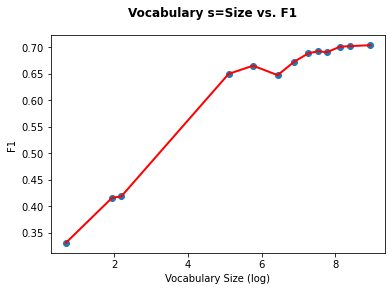

In [131]:
def P6():
#     Keep this random seed here to make comparison easier.
    np.random.seed(0)
    
    coun_vect = CountVectorizer(preprocessor=good_preprocessor)
    count_matrix = coun_vect.fit_transform(train_data)
    count_matrix_dev = coun_vect.transform(dev_data)
    
    # L1
    C1 = [100, 50, 20, 10, 5, 2, 1, 0.5, 0.2, 0.1, 0.01, 0.005, 0.001]
    x= []
    y = []
    for c1 in C1:
        LGR = LogisticRegression(C=c1, solver="liblinear", multi_class="auto", penalty="l1", tol=0.015) 
        LGR.fit(count_matrix, train_labels)
        id = np.nonzero(LGR.coef_.sum(axis = 0))[0]
        voc = np.array(coun_vect.get_feature_names())[id]
        print("L1 C-value:", c1, "Vocabulary length",len(np.nonzero(LGR.coef_.sum(axis = 0))[0]))

        # L2
        c2 = 0.5
        coun_vect = CountVectorizer(vocabulary =  voc)
        count_matrix = coun_vect.fit_transform(train_data)
        count_matrix_dev = coun_vect.transform(dev_data)
        LGR = LogisticRegression(C=c2, solver="liblinear", multi_class="auto", penalty="l2", tol=0.015) 
        LGR.fit(count_matrix, train_labels)
        y_pred =LGR.predict(count_matrix_dev)
        f1 = f1_score(dev_labels, y_pred,average="weighted")
        print("F1=",f1 )
        x.append(np.log(len(voc)))
        y.append(f1)
        
    fig = plt.figure()
    fig.suptitle("Vocabulary s=Size vs. F1", fontweight="bold")
    plt.ylabel("F1")
    plt.xlabel("Vocabulary Size (log)")
    plt.scatter(x, y) 
    plt.plot(x, y, color="red", linewidth=2)
    plt.show()
    
    ## STUDENT START ###
    ## STUDENT END ###

P6()

ANSWER:

How does performance of the models based on reduced vocabularies compare to that of a model based on the full vocabulary?

A: The F1 score increases with the log-size of the vocabulary. The plot suggests that there is a lower limit, log(voc size) ~=6, of the vocabulary size you can reduce to before you start to lose information from the data.  



### Part 7:

How is `TfidfVectorizer` different than `CountVectorizer`?

Produce a Logistic Regression model based on data represented in tf-idf form, with L2 regularization strength of 100.  Evaluate and show the f1 score.  How is `TfidfVectorizer` different than `CountVectorizer`?

Show the 3 documents with highest R ratio, where ...<br/>
$R\,ratio = maximum\,predicted\,probability \div predicted\,probability\,of\,correct\,label$

Explain what the R ratio describes.  What kinds of mistakes is the model making? Suggest a way to address one particular issue that you see.

Note:
* Train on the transformed training data.
* Evaluate on the transformed development data.
* You can use `TfidfVectorizer` and its `.fit_transform` method to transform data to tf-idf form.
* You can use `LogisticRegression(C=100, solver="liblinear", multi_class="auto")` to produce a logistic regression model.
* You can use `LogisticRegression`'s `.predict_proba` method to access predicted probabilities.

In [185]:
def P7():
    ## STUDENT START ###
    
    TF_vect = TfidfVectorizer()
    TF_vect_matrix = TF_vect.fit_transform(train_data)
    TF_vect_matrix_dev = TF_vect.transform(dev_data)
    LGR = LogisticRegression(C=100, solver="liblinear", multi_class="auto")
    LGR.fit(TF_vect_matrix,train_labels)
    yprob_pred = LGR.predict_proba(TF_vect_matrix_dev)
    y_pred = LGR.predict(TF_vect_matrix_dev)
    
    f1 = f1_score(dev_labels, y_pred,average="weighted")
    print("F1=",f1 )
    
    max_prob = np.max(yprob_pred, axis = 1)
    
    r_ratio = []
    for i in range(0, len(dev_labels)):   
        r_ratio.append(max_prob[i]/yprob_pred[i,dev_labels[i]])

    best_n = np.argsort(r_ratio)[-3:]
#     print(best_n)
    
    for b in best_n:
        print("R-ratio:", r_ratio[b])
        print(dev_data[b])
        print("predicted label", y_pred[b],"; correct label",dev_labels[b] )
        print()
    
    ## STUDENT END ###


P7()

F1= 0.7597662427853104
R-ratio: 287.3063890755879

The 24 children were, of course, killed by a lone gunman in a second story
window, who fired eight bullets in the space of two seconds...

predicted label 3 ; correct label 0

R-ratio: 325.0037301669898
Can anyone provide me a ftp site where I can obtain a online version
of the Book of Mormon. Please email the internet address if possible.
predicted label 1 ; correct label 3

R-ratio: 929.3566638687251
I am pleased to announce that a *revised version* of _The Easy-to-Read Book
of Mormon_ (former title: _Mormon's Book_) by Lynn Matthews Anderson is now
available through anonymous ftp (see information below). In addition to the
change in title, the revised ETR BOM has been shortened by several pages
(eliminating many extraneous "that's" and "of's"), and many (minor) errors
have been corrected. This release includes a simplified Joseph Smith Story,
testimonies of the three and eight witnesses, and a "Words-to-Know"
glossary.

As with the 

ANSWER:

How is TfidfVectorizer different than CountVectorizer?

A: TF-IDF if the short for term frequency–inverse document frequency. It means the vectorizer not only counts the frequency of the words, but also tries to adjust the weights/frequency by comparing the occurrence of the words in the corpus, a huge collection of documents. 

Produce a Logistic Regression model based on data represented in tf-idf form, with L2 regularization strength of 100. Evaluate and show the f1 score. How is TfidfVectorizer different than CountVectorizer?

A: The F1 score using TfidfVectorizer(0.75) is higher than CountVectorizer(0.7). The adjusted counts/frequency of features based on the corpus improved the performance of the model. 

Explain what the R ratio describes. 

A: The R-ratio describes the ratio between the predicted probability of the model to the 𝑝𝑟𝑒𝑑𝑖𝑐𝑡𝑒𝑑 𝑝𝑟𝑜𝑏𝑎𝑏𝑖𝑙𝑖𝑡𝑦 𝑜𝑓 the 𝑐𝑜𝑟𝑟𝑒𝑐𝑡 𝑙𝑎𝑏𝑒𝑙.  This ratio kind of describes how well the model is calibrated, which means how close the predicted probability is to the probability with the correct label.

What kinds of mistakes is the model making? 

A: A lot of cases are misclassified with case 3, religion, especially with case 0, the alt.theism. This part needs more work to differentiate the two topics, since the topics are kind of related . 

Suggest a way to address one particular issue that you see.

A: I would actually combine the two topics in a way since they are close to each other. I will then generate a logistic regression model to differentiate the combined category with the other two, and build another two-class logistic regression model to categorize alt.theism and religion topics. The features should be more differentiable in the second level. 


### Part 8 EXTRA CREDIT:

Produce a Logistic Regression model to implement your suggestion from Part 7.